In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset1 = pd.read_csv("Datasets/goemotions_1.csv")
dataset1.shape

(70000, 37)

In [3]:
dataset2 = pd.read_csv("Datasets/goemotions_2.csv")
dataset2.shape

(70000, 37)

In [4]:
dataset3 = pd.read_csv("Datasets/goemotions_3.csv")
dataset3.shape

(71225, 37)

### Combine all three dataset

In [5]:
combine_dataset = pd.concat([dataset1, dataset2, dataset3])
combine_dataset.shape


(211225, 37)

In [6]:
# get emotion columns
emotion_cols = combine_dataset.columns[9:]

# create new column
combine_dataset['emotion'] = combine_dataset[emotion_cols].idxmax(axis=1)

# now select only needed columns
df = combine_dataset[['text', 'emotion']]

# df = pd.read_csv("Datasets/emotion_dataset_4000.csv")

In [7]:
df.head()

,text,emotion
0,That game hurt.,sadness
1,>sexuality shouldn’t be a grouping category I...,admiration
2,"You do right, if you don't care then fuck 'em!",neutral
3,Man I love reddit.,love
4,"[NAME] was nowhere near them, he was by the Fa...",neutral


Dataset is been prepared

### Feature engenerring

In [8]:
df.columns

Index(['text', 'emotion'], dtype='str')

In [9]:
df["emotion"].unique()

<StringArray>
[       'sadness',     'admiration',        'neutral',           'love',
      'gratitude',    'disapproval',      'amusement', 'disappointment',
    'realization',      'annoyance',      'confusion',       'optimism',
      'curiosity',     'excitement',         'caring',        'disgust',
        'remorse',            'joy',       'approval',  'embarrassment',
       'surprise',          'anger',          'grief',          'pride',
         'desire',         'relief',           'fear',    'nervousness']
Length: 28, dtype: str

In [10]:
df["emotion"].value_counts()

emotion
neutral           55298
admiration        20542
approval          15530
annoyance         11929
disapproval        8917
amusement          8862
gratitude          8437
anger              7956
curiosity          7707
disappointment     6769
confusion          6600
love               5310
caring             5147
realization        5125
joy                5120
optimism           4994
excitement         4375
sadness            3863
surprise           3472
disgust            3420
desire             3002
fear               2514
embarrassment      1720
remorse            1648
nervousness         946
relief              814
pride               714
grief               494
Name: count, dtype: int64

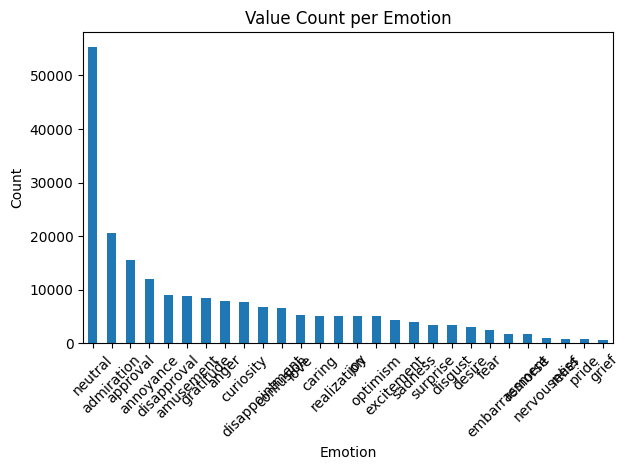

In [11]:
emotion_counts = df['emotion'].value_counts()

# Plot bar graph
plt.figure()
emotion_counts.plot(kind='bar')

plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Value Count per Emotion")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df['emotion'].value_counts().min()

np.int64(494)

In [36]:
from sklearn.utils import resample
target = 1000

balanced_groups = []

for label, group in df.groupby('emotion'):
    if len(group) > target:
        group = group.sample(target, random_state=42)
    else:
        group = resample(group, replace=True, n_samples=target, random_state=42)
    
    balanced_groups.append(group)

df_balanced = pd.concat(balanced_groups).sample(frac=1).reset_index(drop=True)

df = df_balanced

In [37]:
df.head()

,text,emotion
0,Happy Easter everyone!!,joy
1,"> I miss frequent, monogamous sex enough that ...",desire
2,I think there is something odd about it too......,confusion
3,Very happy with this !,love
4,And then expanded on! It's so good. Haha I sti...,admiration


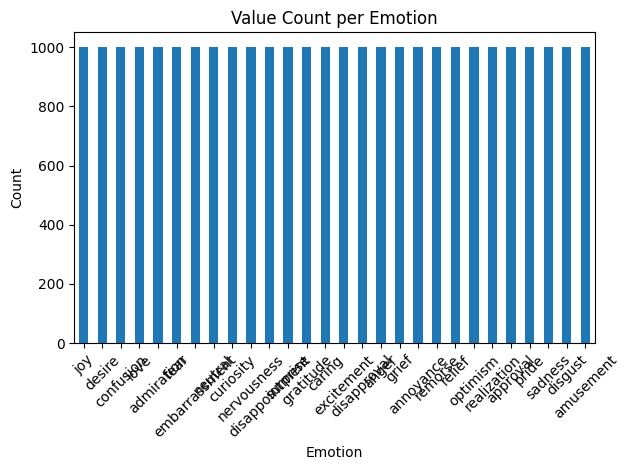

In [38]:
emotion_counts = df['emotion'].value_counts()

# Plot bar graph
plt.figure()
emotion_counts.plot(kind='bar')

plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Value Count per Emotion")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
selected_emotions = [
    'neutral',
    'confusion',
    'anger',
    'annoyance',
    'disapproval',
    'nervousness',
    'fear',
    'disappointment',
    'sadness',
    'joy',
    'excitement',
    'optimism'
]

df_filtered = df[df['emotion'].isin(selected_emotions)].copy()
df = df_filtered

In [40]:
df["emotion"].value_counts()

emotion
joy               1000
confusion         1000
fear              1000
neutral           1000
nervousness       1000
disappointment    1000
excitement        1000
disapproval       1000
anger             1000
annoyance         1000
optimism          1000
sadness           1000
Name: count, dtype: int64

In [8]:
import re
import pandas as pd
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# download once
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # 1. lowercase
    text = text.lower()
    
    # 2. remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)
    
    # 3. remove punctuation & special chars
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    
    # 4. tokenize (like splitting string → array)
    words = text.split()
    
    # 5. remove stopwords
    words = [w for w in words if w not in stop_words]
    
    # 6. lemmatization
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # 7. join back to string
    return " ".join(words)

# apply to dataset
df['text'] = df['text'].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yadnesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yadnesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yadnesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [69]:
df.head()

,text,emotion
0,game hurt,sadness
1,sexuality shouldnt grouping category make diff...,admiration
2,right dont care fuck em,neutral
3,man love reddit,love
4,name nowhere near falcon,neutral


### Train test split

In [11]:
from sklearn.model_selection import train_test_split

# Assuming your dataframe is called df

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["emotion"]  # IMPORTANT
)

print("Train size:", len(train_df))
print("Test size:", len(test_df))

Train size: 168980
Test size: 42245


### Fasttext Model

In [18]:
def to_fasttext_format(dataframe, filename):
    with open(filename, "w", encoding="utf-8") as f:
        for _, row in dataframe.iterrows():
            label = "__label__" + row["emotion"]
            text = row["text"].replace("\n", " ")
            f.write(f"{label} {text}\n")

to_fasttext_format(train_df, "./Datasets/train.txt")
to_fasttext_format(test_df, "./Datasets/test.txt")

### Train the fasttext Model

In [19]:
import fasttext

model = fasttext.train_supervised(
    input="./Datasets/train.txt",
    lr=0.5,
    epoch=25,
    wordNgrams=2
)

model.save_model("./Model/emotion_model.bin")
print("Model Trained ✅")

Model Trained ✅


In [20]:
import numpy as np

# Monkey patch for NumPy 2.x compatibility
_original_array = np.array

def safe_array(obj, *args, **kwargs):
    if "copy" in kwargs:
        kwargs.pop("copy")
    return _original_array(obj, *args, **kwargs)

np.array = safe_array

In [21]:
import fasttext

model = fasttext.load_model("./Model/emotion_model.bin")

labels, probabilities = model.predict("Im not happy", k=5)

print(labels)
print(probabilities)

('__label__joy', '__label__excitement', '__label__neutral', '__label__sadness', '__label__optimism')
[9.99997735e-01 1.97274603e-05 1.21801795e-05 1.02385329e-05
 1.00946045e-05]


In [22]:
result = model.test("./Datasets/test.txt")
result

(1186, 0.290893760539629, 0.290893760539629)

### Logistic regresion

In [12]:
X_train = train_df["text"]
y_train = train_df["emotion"]

X_test = test_df["text"]
y_test = test_df["emotion"]

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [49]:
X_test_vec[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 5000))

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(
    LogisticRegression(max_iter=200)
)

model.fit(X_train_vec, y_train)

,"estimator estimator: estimator objectA regressor or a classifier that implements :term:`fit`.When a classifier is passed, :term:`decision_function` will be usedin priority and it will fallback to :term:`predict_proba` if it is notavailable.When a regressor is passed, :term:`predict` is used.",LogisticRegre...(max_iter=200)
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation: the `n_classes`one-vs-rest problems are computed in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: 0.20 `n_jobs` default changed from 1 to None",None
,"verbose verbose: int, default=0The verbosity level, if non zero, progress messages are printed.Below 50, the output is sent to stderr. Otherwise, the output is sentto stdout. The frequency of the messages increases with the verbositylevel, reporting all iterations at 10. See :class:`joblib.Parallel` formore details... versionadded:: 1.1",0
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=

In [19]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_vec)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.39415315421943425

### Pick the model and vectorizor

In [22]:
import pickle
with open("pkl/emotion_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [23]:
with open("pkl/vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)